In [39]:
# Importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [40]:
df = pd.read_csv('movie_reviews.csv')
df.isna().sum() # 705 rows do not have the name of the critic. However for the predictions, critic name won't be used. Hence, it can be ignored

df['fresh'].value_counts() # 23 rows do not have a fresh or rotten classification. These rows need to be removed
df.drop(df[df['fresh']== 'none'].index, inplace=True)
df['fresh'].value_counts()

fresh     8389
rotten    5030
Name: fresh, dtype: int64

In [41]:
# Understand distribution of fresh and rotten in the reviews:

px.histogram(df, x= 'fresh', labels={'y':'Number of records', 'fresh':'Reviews'})

The dataset consists of more records of movies having fresh reviews than rotten reviews. Fresh movies look to be almost 50% more than rotten ones.

In [42]:
df['title'].value_counts() #There are 1720 unique movies in the dataset. 

Face/Off                    51
The Time Traveler's Wife    40
King Kong                   36
Kinsey                      34
Hamlet                      33
                            ..
She's So Lovely              1
The Land Girls               1
Boys Life 2                  1
Heartburn                    1
Fluke                        1
Name: title, Length: 1720, dtype: int64

In [43]:
# Using countvectorizer to convert reviews text into an array of words. This function returns a sparse matrix.
# A sparse matrix is the one which contains mostly all zeroes.
# Reasons for using sparse matrix instead of simple matrix ?

#Storage: There are lesser non-zero elements than zeros and thus lesser memory can be used to store only those elements.
#Computing time: Computing time can be saved by logically designing a data structure traversing only non-zero elements..

from sklearn.feature_extraction.text import CountVectorizer
reviews = df['quote'].values
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)

In [44]:
# Converting fresh and rotten to 0 and 1
df.columns
df['Reviews_num']= df['fresh'].apply(lambda x: 1 if x=='fresh' else 0)

y = df['Reviews_num']

In [45]:
# train test split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 1)     

In [46]:
#Hyper parameter tuning of Naive Bayes classifier:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0,0.1,1,5,10,50]}

NB = MultinomialNB()
nb_tuned = GridSearchCV(estimator=NB, param_grid=parameters)
nb_tuned.fit(X_train, y_train)
nb_predict_train = nb_tuned.predict(X_train)
nb_predict_test =  nb_tuned.predict(X_test)

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



In [47]:
from sklearn.metrics import fbeta_score
print('Accuracy on the training data is: {}'.format((fbeta_score(y_train,nb_predict_train, beta=0.5)*100)))
print('Accuracy on the testing data is: {}'.format((fbeta_score(y_test,nb_predict_test, beta=0.5)*100)))      

Accuracy on the training data is: 92.78919515600144
Accuracy on the testing data is: 80.39888953828171


The F-score for the training dataset is 92% while that for the testing dataset is 80%. Since the model runs on the training dataset, it is expected that the training accuracy will be better than the testing accuracy.

In [48]:
# Performing text stemming using Porter stemmer algorithm and comparing it with previous results:

import nltk
from nltk.stem import PorterStemmer
#nltk.download('punkt')

# Converting reviews to lower case
df['quote'] = df['quote'].apply(lambda x: x.lower())

# Removing all punctuations
df['quote'] = df['quote'].apply(lambda x: x.replace('[^\w\s]',''))

# Tokenize the word present in quote
df['quote'] = df['quote'].apply(nltk.word_tokenize)
porter_stemmer = PorterStemmer()
df['quote'] = df['quote'].apply(lambda x: [porter_stemmer.stem(y) for y in x])

# Converting the list of words into a string using a join
df['quote'] = df['quote'].apply(lambda x: ' '.join(x))

In [49]:
df['quote'].head()

0    so ingeni in concept , design and execut that ...
1                     the year 's most invent comedi .
2    a win anim featur that ha someth for everyon o...
3    the film sport a provoc and appeal stori that ...
4    an entertain computer-gener , hyperrealist ani...
Name: quote, dtype: object

In [50]:
vector_ps = CountVectorizer(stop_words = "english", strip_accents = "unicode", lowercase = True)
X_ps = vector_ps.fit_transform(df['quote'])

# train test split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_ps, y, test_size=0.3, random_state = 1) 
parameters = {'alpha': [0,0.1,1,5,10,50]}

NB_ps = MultinomialNB()
nb_tuned = GridSearchCV(estimator=NB_ps, param_grid=parameters)
fitted_model = nb_tuned.fit(X_train, y_train)
nb_predict_train = nb_tuned.predict(X_train)
nb_predict_test =  nb_tuned.predict(X_test)

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



In [51]:
print('Accuracy on the training data is: {}'.format((fbeta_score(y_train,nb_predict_train, beta=0.5)*100)))
print('Accuracy on the testing data is: {}'.format((fbeta_score(y_test,nb_predict_test, beta=0.5)*100)))      

Accuracy on the training data is: 90.6502364788778
Accuracy on the testing data is: 79.9825174825175


<AxesSubplot:>

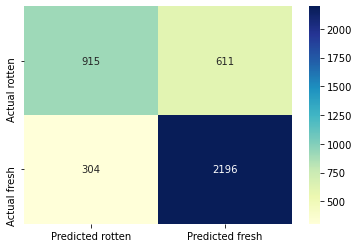

In [62]:
# Verifying confusion matrix:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, nb_predict_test, labels = [0,1])
cm

# Visualizing confusion matrix:

x_labels = ['Predicted rotten', 'Predicted fresh']
y_labels = ['Actual rotten', 'Actual fresh']
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',xticklabels=x_labels,yticklabels=y_labels,)

As can be seen from the above results, using porter stemmer algorithm to stem the words did not give better results than the model trained without porter stemmer algoritm. The newly trained model achieved an accuracy of ~80% on the test data.

Resources:

1. https://stackoverflow.com/questions/47898326/how-vectorizer-fit-transform-work-in-sklearn/54350840 - To understand how CountVectorizer.fit_transform works

2. nltk.word_tokenize takes string as an input and breaks all the words including punctuations into a list.

Eg: 

corpus = 'This is , ; " the first document'
y = nltk.word_tokenize(corpus)
y

>> ['This', 'is', ',', ';', '``', 'the', 'first', 'document']

3. Understanding confusion matrix interpretation:

https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79


